<a href="https://colab.research.google.com/github/alexis24694/proyecto-ml-2020-1/blob/master/proyecto_ml_2020_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto del Curso Aprendizaje Automatico**
# **Mice Protein Expression Data Set - Grupo D**

El codigo de este notebook ha sido desarrollado con ayuda del material provisto en las clases de curso

In [2]:
#Importando las librerias necesarias para la experimentacion
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import lightgbm as lgb

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from matplotlib.pyplot import figure




/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
# Descargar el dataset de un archivo subido al drive mediante su ID
!wget -O Data_Cortex_Nuclear.csv "https://drive.google.com/uc?id=1NDjOlxkHDEBQ08SlO1EAPDPeoISjsY05&export=download"

--2020-07-20 23:16:01--  https://drive.google.com/uc?id=1NDjOlxkHDEBQ08SlO1EAPDPeoISjsY05&export=download
Resolving drive.google.com (drive.google.com)... 64.233.189.113, 64.233.189.139, 64.233.189.138, ...
Connecting to drive.google.com (drive.google.com)|64.233.189.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eqrs4a97oanlu1n31e7do88uobdmss90/1595286900000/07257263427831096354/*/1NDjOlxkHDEBQ08SlO1EAPDPeoISjsY05?e=download [following]
--2020-07-20 23:16:02--  https://doc-0k-5k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/eqrs4a97oanlu1n31e7do88uobdmss90/1595286900000/07257263427831096354/*/1NDjOlxkHDEBQ08SlO1EAPDPeoISjsY05?e=download
Resolving doc-0k-5k-docs.googleusercontent.com (doc-0k-5k-docs.googleusercontent.com)... 74.125.204.132, 2404:6800:4008:c04::84
Connecting to doc-0k-5k-docs.googleusercontent.com (doc-0k

In [4]:
#Cargando el archivo a un dataframe
data = pd.read_csv('Data_Cortex_Nuclear.csv')

In [5]:
#Variables
data.columns

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [6]:
data.shape

(1080, 82)

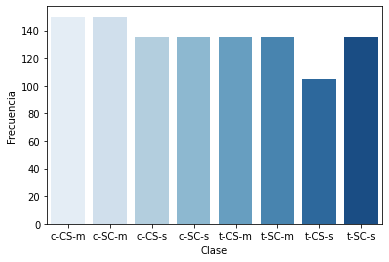

In [12]:
#Visualizando la distribucion de la variable objetivo
ax=sns.countplot(x="class",data=data, palette="Blues")
ax.set(xlabel='Clase', ylabel='Frecuencia')
plt.show()

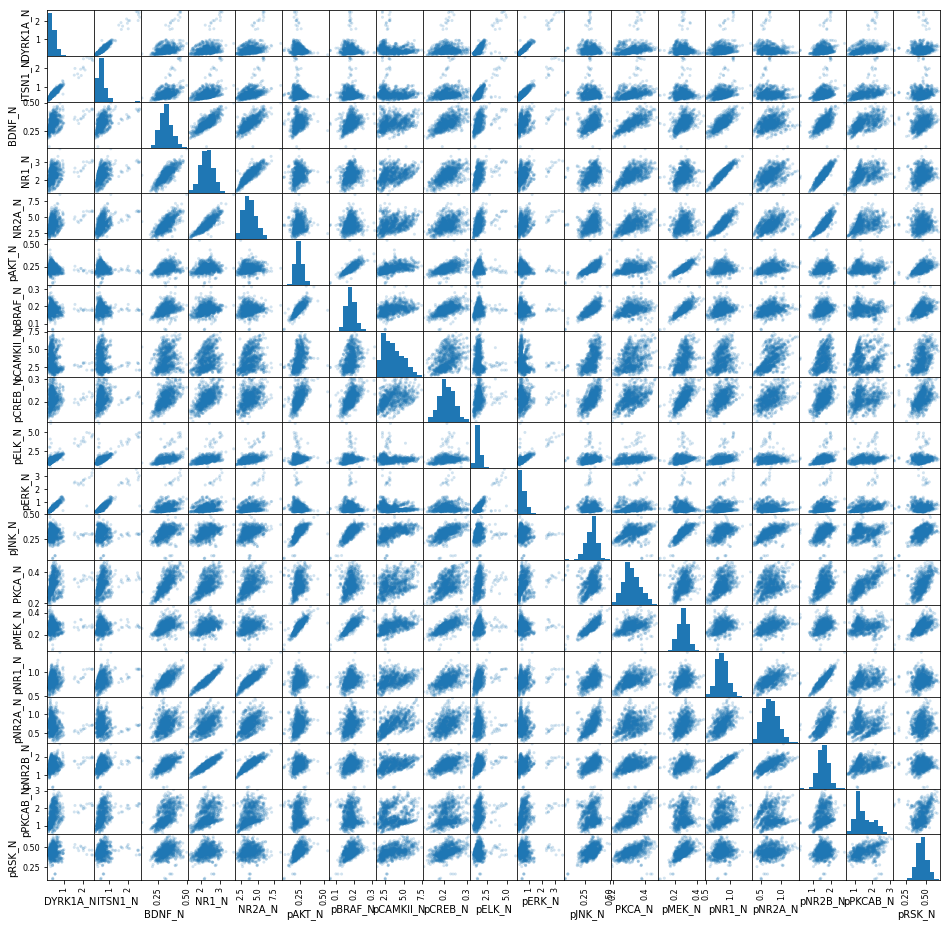

In [ ]:
#Vizualizacion de la distribucion e interaccion entre variables

df = data.drop(["Genotype","Treatment","Behavior","class"], 1)

from pandas.plotting import scatter_matrix
scatter_matrix(df.iloc[:,0:20], alpha=0.2,figsize=(16,16),diagonal='hist')
plt.show()

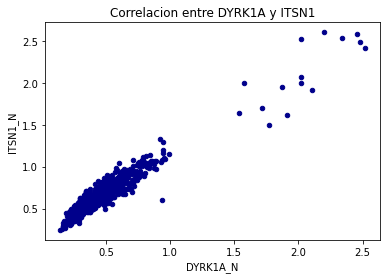

In [13]:
#Exploracion particular de atributos
data.plot.scatter(x='DYRK1A_N', y='ITSN1_N',c='darkblue')
plt.title('Correlacion entre DYRK1A y ITSN1')
plt.show()

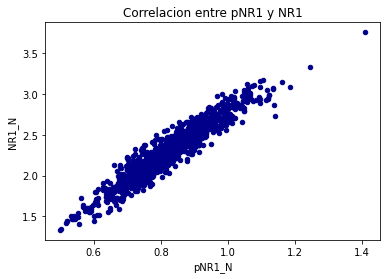

In [14]:
data.plot.scatter(x='pNR1_N', y='NR1_N',c='darkblue')
plt.title('Correlacion entre pNR1 y NR1')
plt.show()

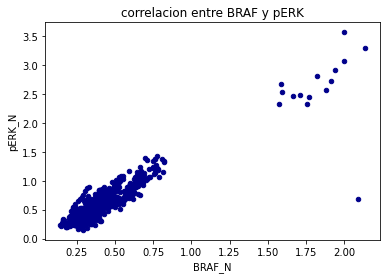

In [16]:
data.plot.scatter(x='BRAF_N', y='pERK_N',c='darkblue')
plt.title('correlacion entre BRAF y pERK')
plt.show()

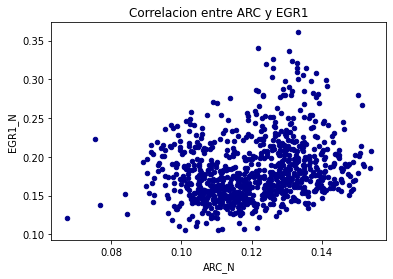

In [17]:
data.plot.scatter(x='ARC_N', y='EGR1_N',c='darkblue')
plt.title('Correlacion entre ARC y EGR1')
plt.show()

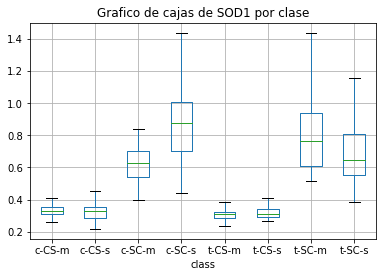

In [8]:
data.boxplot(column='SOD1_N',by='class',showfliers=False)
plt.title('Grafico de cajas de SOD1 por clase')
plt.suptitle('')
plt.show()

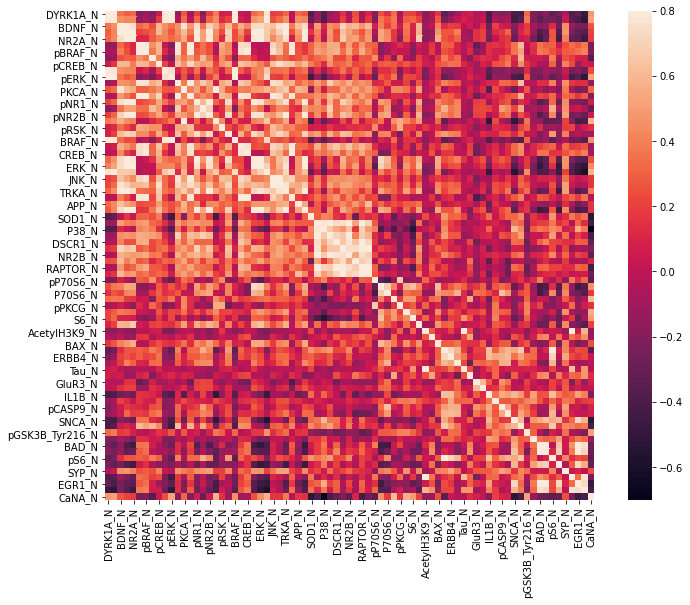

In [ ]:
#Visualizando la matriz de correlacion de los datos
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

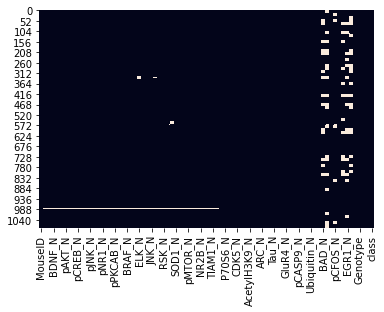

In [ ]:
#Visualizando un mapa de calor de los datos nulos
sns.heatmap(data.isnull(), cbar=False)

# **Preprocesamiento de datos**

In [ ]:
#Calculando el porcentaje de valores nulos
null_percentages = data.isnull().sum(axis=0) / data.shape[0]

#Considerando un umbral de 20%
threshold = 0.2

#Se tienen 2 columnas que superan el umbral de valores nulos
null_percentages[null_percentages > threshold]

#Eliminando las columnas cuyo umbral supera el 20%
data = data.loc[:, data.isnull().sum() < 0.2*data.shape[0]]

#Recodificacion manual de las columnas con valores categoricos
data["Genotype"]=data["Genotype"].replace({"Control":0,"Ts65Dn":1})
data["Treatment"]=data["Treatment"].replace({"Memantine":0,"Saline":1})
data["Behavior"]=data["Behavior"].replace({"C/S":0,"S/C":1})
data["class"]=data["class"].replace({"c-CS-s":0,"c-CS-m":1,"c-SC-s":2,"c-SC-m":3,"t-CS-s":4,"t-CS-m":5,"t-SC-s":6,"t-SC-m":7})

#Inputando la media de los valores de las mediciones
data = data.fillna(data.mean())




# **Clasificacion**

In [ ]:
#Separando las caracteristicas del target
X = data.loc[:, 'DYRK1A_N':'CaNA_N']
y = data['class']

In [ ]:
#Separando el conjunto de entrenamiento y prueba (80% entrenamiento - 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Random Forest

Entrenamiento

In [ ]:
#Definiendo los hiperparametros a opmitizar
max_features = [9, 10, 11]
max_depth = [57, 60, 63]
min_samples_leaf = [4]
n_estimators = [1200]

parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}


rfc = RandomForestClassifier(oob_score = True)
rfc_grid = GridSearchCV(estimator = rfc,
                        scoring = 'f1_micro',   # Se definio en el experimento medir utilizando la metrica f1
                        param_grid = parameter_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )

#Entrenando a un modelo Random Forest
#Encontrando los mejores hiperparametros con GridSearchCV
rfc_grid.fit(X_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  1.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=None,
                                 

Evaluacion del modelo

In [ ]:
#Prediccion con los hiperparametros obtenidos
rfc_best = rfc_grid.best_estimator_
rfc_prediction = rfc_best.predict(X_test)

#Evaluacion de la metrica f1
rfc_f1_score = metrics.f1_score(y_test, rfc_prediction, average='micro') 
print('Valor de la metrica f1 para el conjunto de prueba:', rfc_f1_score)

Valor de la metrica f1 para el conjunto de prueba: 0.9907407407407407


Evaluacion de caracteristicas mas importantes

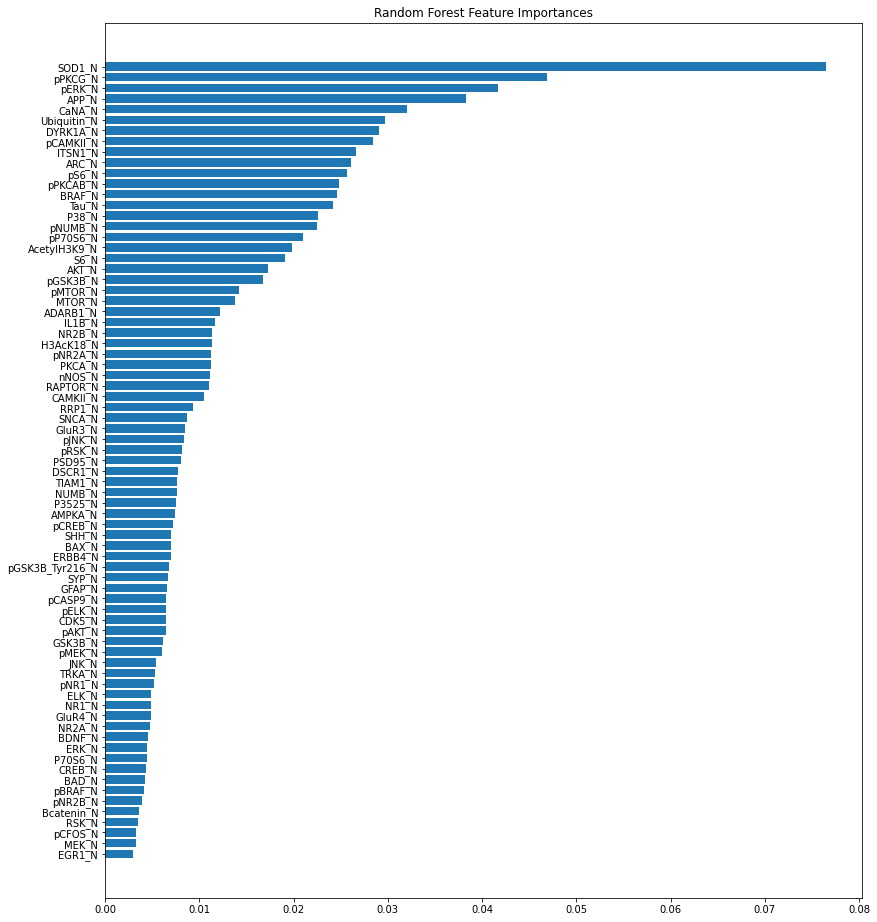

In [ ]:
feature_names = X_train.columns.values
rfc_feature_importances = rfc_best.feature_importances_
sorted_idx = rfc_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots()
ax.barh(y_ticks, rfc_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
#Aumentando las dimensiones del grafico, para que se puedan visualizar todas las caracteristicas
fig.set_figheight(15)
fig.set_figwidth(15)


plt.show()

##LightGBM

Entrenamiento inicial

In [ ]:
#Adaptado del Notebook https://www.kaggle.com/pintu161/implementation-of-lightgbm-for-begineers
d_train = lgb.Dataset(X_train, label= y_train)
params = {}
params['learning_rate']= 0.003
params['boosting_type']='gbdt'
params['objective']='multiclass'
params['metric']='multi_error'
params['sub_feature']=0.5
params['num_leaves']= 10
params['min_data']=50
params['max_depth']=10
params['num_class'] = 8

clf= lgb.train(params, d_train, 100)

Evaluacion

In [ ]:
#El resultado de la prediccion es un arreglo con las probabilidades para cada muestra del conjunto
lgbm_pred_probs = clf.predict(X_test)

#La clase que el modelo predice es la que tiene la mayor probabilidad, el resultado de las predicciones se arma en una iteracion
lgbm_pred = []

for lgbm_pred_prob in lgbm_pred_probs:
    lgbm_pred.append(np.argmax(lgbm_pred_prob))

#Evaluando la metrica f1
lgbm_f1_score = metrics.f1_score(y_test, lgbm_pred, average='micro') 
print('Valor de la metrica f1 para el conjunto de prueba:', lgbm_f1_score)

Valor de la metrica f1 para el conjunto de prueba: 0.8379629629629629


Evaluacion de caracteristicas mas importantes

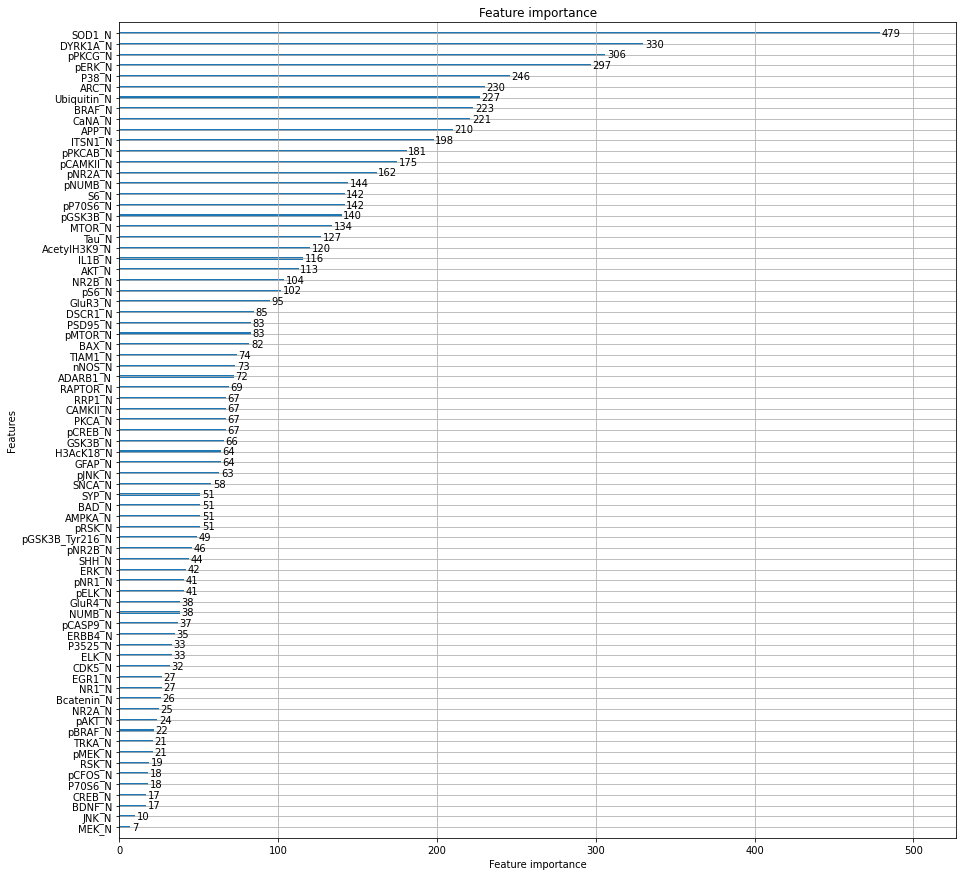

In [ ]:
x = lgb.plot_importance(clf)
x.figure.set_figheight(15)
x.figure.set_figwidth(15)

Optimizacion de hiperparametros

In [ ]:
from sklearn.model_selection import KFold

lgb_estimator = lgb.LGBMClassifier(boosting_type='gbdt',learning_rate=0.003,
                                   objective="multiclass",metric="multi_error",
                                   sub_feature=0.5,num_leaves=10,min_data=50,
                                   max_depth=10,num_class=8)


gkf = KFold(n_splits=5, shuffle=True, random_state=42).split(X=X_train, y=y_train)

param_grid = {
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5],
    'min_data_in_leaf': [30, 50],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

gsearch = GridSearchCV(estimator=lgb_estimator, param_grid=param_grid, cv=gkf)
lgb_model = gsearch.fit(X=X_train, y=y_train)

In [ ]:
#Prediccion con los hiperparametros obtenidos
lbgm_best = gsearch.best_estimator_
lbgm_prediction = lbgm_best.predict(X_test)

#Evaluacion de la metrica f1
lbgm_f1_score = metrics.f1_score(y_test, lbgm_prediction, average='micro') 
print('Valor de la metrica f1 para el conjunto de prueba:', rfc_f1_score)

Valor de la metrica f1 para el conjunto de prueba: 0.9907407407407407


Evaluacion de caracteristicas mas importantes luego de la optimizacion de hiperparametros

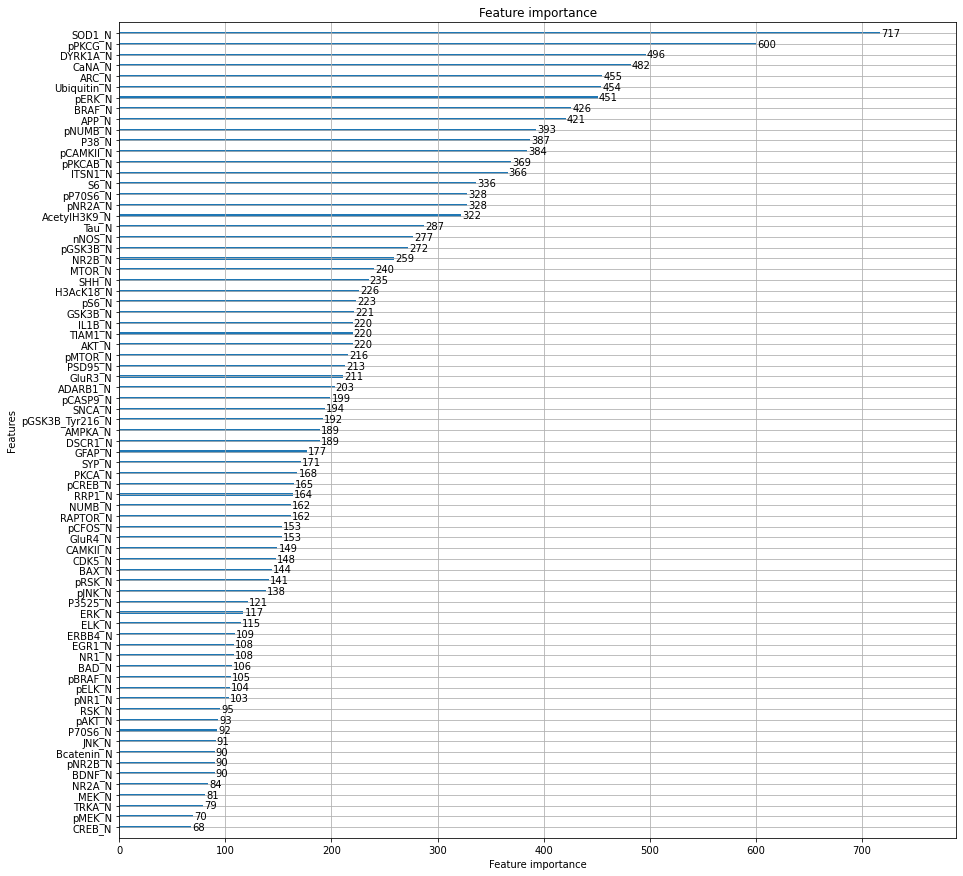

In [ ]:
x = lgb.plot_importance(lbgm_best)
x.figure.set_figheight(15)
x.figure.set_figwidth(15)

## XGBOOST

In [ ]:
import xgboost as xgb

In [ ]:
xg_model = xgb.XGBClassifier()
xg_model.fit(X_train, y_train, eval_metric="auc")

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import GridSearchCV

max_features = [9, 10, 11]
max_depth = [57, 60, 63]
min_samples_leaf = [4]
n_estimators = [1200]

parameter_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}


gscv_xgboost = GridSearchCV(estimator = xg_model, 
                        param_grid = parameter_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                )

In [ ]:
gscv_xgboost.fit(X_train, y_train)

gscv_xgboost_best = gscv_xgboost.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
print(gscv_xgboost.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:  2.7min finished


Los hiperparámetros del mejor modelo son:
{'max_depth': 57, 'max_features': 9, 'min_samples_leaf': 4, 'n_estimators': 1200}


In [ ]:
print('Acurrancy después de búsqueda en grilla en entrenamiento:', gscv_xgboost_best.score(X_train, y_train))
print('Acurrancy después de búsqueda en grilla en validación:', gscv_xgboost_best.score(X_test, y_test))

Acurrancy después de búsqueda en grilla en entrenamiento: 1.0
Acurrancy después de búsqueda en grilla en validación: 0.9814814814814815


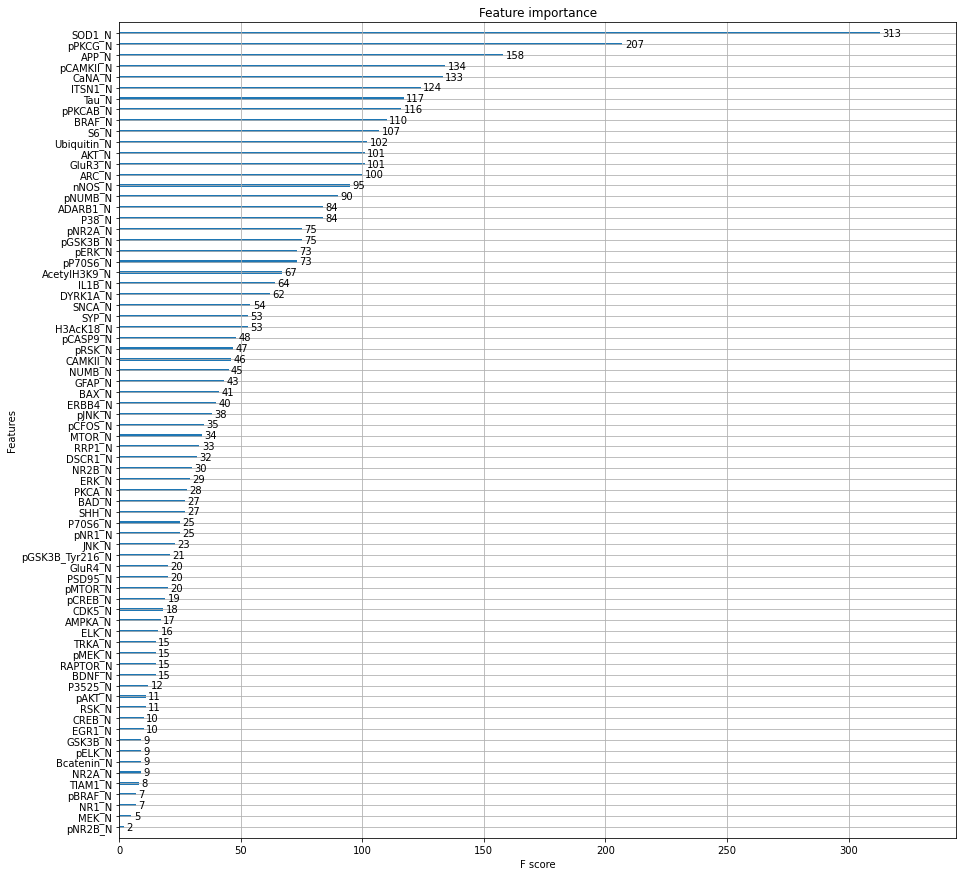

In [ ]:
from xgboost import plot_importance
# plot feature importance

y = plot_importance(xg_model)# gscv_xgboost
y.figure.set_figheight(15)
y.figure.set_figwidth(15)